# File descriptions
train.csv - the training set  
test.csv - the test set  
data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here  
sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms  

# Data fields
아래와 같이 수많은 feature들이 있다.  
이중 일단 초보자용으로 10개 이내의 feature만 선정하여 빠르게 끝내보는걸로 해보자.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.  
MSSubClass: The building class  
MSZoning: The general zoning classification  
LotFrontage: Linear feet of street connected to property  
LotArea: Lot size in square feet  
Street: Type of road access  
Alley: Type of alley access  
LotShape: General shape of property  
LandContour: Flatness of the property  
Utilities: Type of utilities available  
LotConfig: Lot configuration  
LandSlope: Slope of property  
Neighborhood: Physical locations within Ames city limits  
Condition1: Proximity to main road or railroad  
Condition2: Proximity to main road or railroad (if a second is present)  
BldgType: Type of dwelling  
HouseStyle: Style of dwelling  
OverallQual: Overall material and finish quality  
OverallCond: Overall condition rating   
YearBuilt: Original construction date  
YearRemodAdd: Remodel date  
RoofStyle: Type of roof  
RoofMatl: Roof material  
Exterior1st: Exterior covering on house  
Exterior2nd: Exterior covering on house (if more than one material)  
MasVnrType: Masonry veneer type  
MasVnrArea: Masonry veneer area in square feet  
ExterQual: Exterior material quality  
ExterCond: Present condition of the material on the exterior  
Foundation: Type of foundation  
BsmtQual: Height of the basement  
BsmtCond: General condition of the basement  
BsmtExposure: Walkout or garden level basement walls  
BsmtFinType1: Quality of basement finished area  
BsmtFinSF1: Type 1 finished square feet  
BsmtFinType2: Quality of second finished area (if present)  
BsmtFinSF2: Type 2 finished square feet  
BsmtUnfSF: Unfinished square feet of basement area  
TotalBsmtSF: Total square feet of basement area  
Heating: Type of heating  
HeatingQC: Heating quality and condition  
CentralAir: Central air conditioning  
Electrical: Electrical system  
1stFlrSF: First Floor square feet  
2ndFlrSF: Second floor square feet  
LowQualFinSF: Low quality finished square feet (all floors)  
GrLivArea: Above grade (ground) living area square feet  
BsmtFullBath: Basement full bathrooms  
BsmtHalfBath: Basement half bathrooms  
FullBath: Full bathrooms above grade  
HalfBath: Half baths above grade  
Bedroom: Number of bedrooms above basement level  
Kitchen: Number of kitchens  
KitchenQual: Kitchen quality  
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)  
Functional: Home functionality rating  
Fireplaces: Number of fireplaces  
FireplaceQu: Fireplace quality   
GarageType: Garage location  
GarageYrBlt: Year garage was built  
GarageFinish: Interior finish of the garage  
GarageCars: Size of garage in car capacity   
GarageArea: Size of garage in square feet  
GarageQual: Garage quality  
GarageCond: Garage condition  
PavedDrive: Paved driveway  
WoodDeckSF: Wood deck area in square feet  
OpenPorchSF: Open porch area in square feet  
EnclosedPorch: Enclosed porch area in square feet  
3SsnPorch: Three season porch area in square feet  
ScreenPorch: Screen porch area in square feet  
PoolArea: Pool area in square feet  
PoolQC: Pool quality   
Fence: Fence quality  
MiscFeature: Miscellaneous feature not covered in other categories  
MiscVal: $Value of miscellaneous feature  
MoSold: Month Sold  
YrSold: Year Sold  
SaleType: Type of sale  
SaleCondition: Condition of sale  

# Machine Learning Workflow

1. Define Problem
2. Specify Inputs & Outputs
3. Exploratory data analysis
4. Data Collection
5. Data Preprocessing
6. Data Cleaning
7. Visualization
8. Model Design, Training, and Offline Evaluation
9. Model Deployment, Online Evaluation, and Monitoring
10. Model Maintenance, Diagnosis, and Retraining

# 1. Define Probloem

# 2. Specify Inputs & Outputs
1. 데이터 불려들여오기.
2. 인풋(train_df, test_df) 아웃풋(y_train_df) 나눠놓고.
3. 교수는 index를 나누고(train_index, test_index)
4. train_df(아웃풋제외)와 test_df 합쳐서 한번에 feature 변형.(all_df)

In [1]:
# Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data read
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [3]:
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [4]:
train_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [5]:
train_df.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
test_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [7]:
test_df.tail(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [8]:
y_train_df = pd.DataFrame(train_df, columns=["Id","SalePrice"])

In [9]:
y_train_df.head()

,Id,SalePrice
0,1,208500
1,2,181500
2,3,223500
3,4,140000
4,5,250000


In [10]:
train_index = train_df.Id
test_index = test_df.Id

In [11]:
train_index.head()

0    1
1    2
2    3
3    4
4    5
Name: Id, dtype: int64

In [12]:
test_index.head()

0    1461
1    1462
2    1463
3    1464
4    1465
Name: Id, dtype: int64

In [13]:
train_df2 = train_df.drop(["SalePrice"], axis=1)

In [14]:
all_df = pd.DataFrame(np.concatenate((train_df.drop(["SalePrice"],axis=1), test_df), axis=0),columns=test_df.columns)
# all_df = pd.concat((train_df, test_df), axis=0).reset_index()  -> 요건 Columns들 알파벳순으로 정렬해주고, Sale

In [15]:
datasets = [all_df, train_df]

In [16]:
datasets

[        Id MSSubClass MSZoning LotFrontage LotArea Street Alley LotShape  \
 0        1         60       RL          65    8450   Pave   NaN      Reg   
 1        2         20       RL          80    9600   Pave   NaN      Reg   
 2        3         60       RL          68   11250   Pave   NaN      IR1   
 3        4         70       RL          60    9550   Pave   NaN      IR1   
 4        5         60       RL          84   14260   Pave   NaN      IR1   
 5        6         50       RL          85   14115   Pave   NaN      IR1   
 6        7         20       RL          75   10084   Pave   NaN      Reg   
 7        8         60       RL         NaN   10382   Pave   NaN      IR1   
 8        9         50       RM          51    6120   Pave   NaN      Reg   
 9       10        190       RL          50    7420   Pave   NaN      Reg   
 10      11         20       RL          70   11200   Pave   NaN      Reg   
 11      12         60       RL          85   11924   Pave   NaN      IR1   

In [17]:
all_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# 3. Exploratory data analysis
1. Nan값의 길이들을 보고 0.5이상인애들은 다 drop시키자.
2. corr값들을 heatmap으로 보고 y값과 0.5이상인애들이 feature 볼것의 후보로 정하자.
3. category data들을 sklearn으로든 그냥 get dummy를 하든 replace로 일일히 해주든 해보자.

In [18]:
(all_df.isnull().sum()/len(all_df)).sort_values(ascending=False)

PoolQC           0.996574
MiscFeature      0.964029
Alley            0.932169
Fence            0.804385
FireplaceQu      0.486468
LotFrontage      0.166495
GarageCond       0.054471
GarageQual       0.054471
GarageYrBlt      0.054471
GarageFinish     0.054471
GarageType       0.053786
BsmtCond         0.028092
BsmtExposure     0.028092
BsmtQual         0.027749
BsmtFinType2     0.027407
BsmtFinType1     0.027064
MasVnrType       0.008222
MasVnrArea       0.007879
MSZoning         0.001370
BsmtHalfBath     0.000685
Utilities        0.000685
Functional       0.000685
BsmtFullBath     0.000685
BsmtFinSF1       0.000343
Exterior1st      0.000343
Exterior2nd      0.000343
BsmtFinSF2       0.000343
BsmtUnfSF        0.000343
TotalBsmtSF      0.000343
SaleType         0.000343
                   ...   
YearBuilt        0.000000
OverallCond      0.000000
SaleCondition    0.000000
Heating          0.000000
ExterQual        0.000000
ExterCond        0.000000
YrSold           0.000000
MoSold      

### 아래와 같이 4개가 결측치 50% 이상이므로 날려주자.
PoolQC           0.996574  
MiscFeature      0.964029  
Alley            0.932169  
Fence            0.804385  


In [19]:
# 최대로 보여지는 columns 늘리자. row도 동일하게 가능.
pd.options.display.max_columns = 999

In [20]:
pd.options.display.max_columns

999

In [21]:
all_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [22]:
drop_columns = []
for column in all_df.columns:
    if all_df[column].isnull().sum()/len(all_df) >= 0.5:
        drop_columns.append(column)
drop_columns

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [23]:
for df in datasets:
    df.drop(drop_columns, axis=1, inplace=True)

In [24]:
all_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal


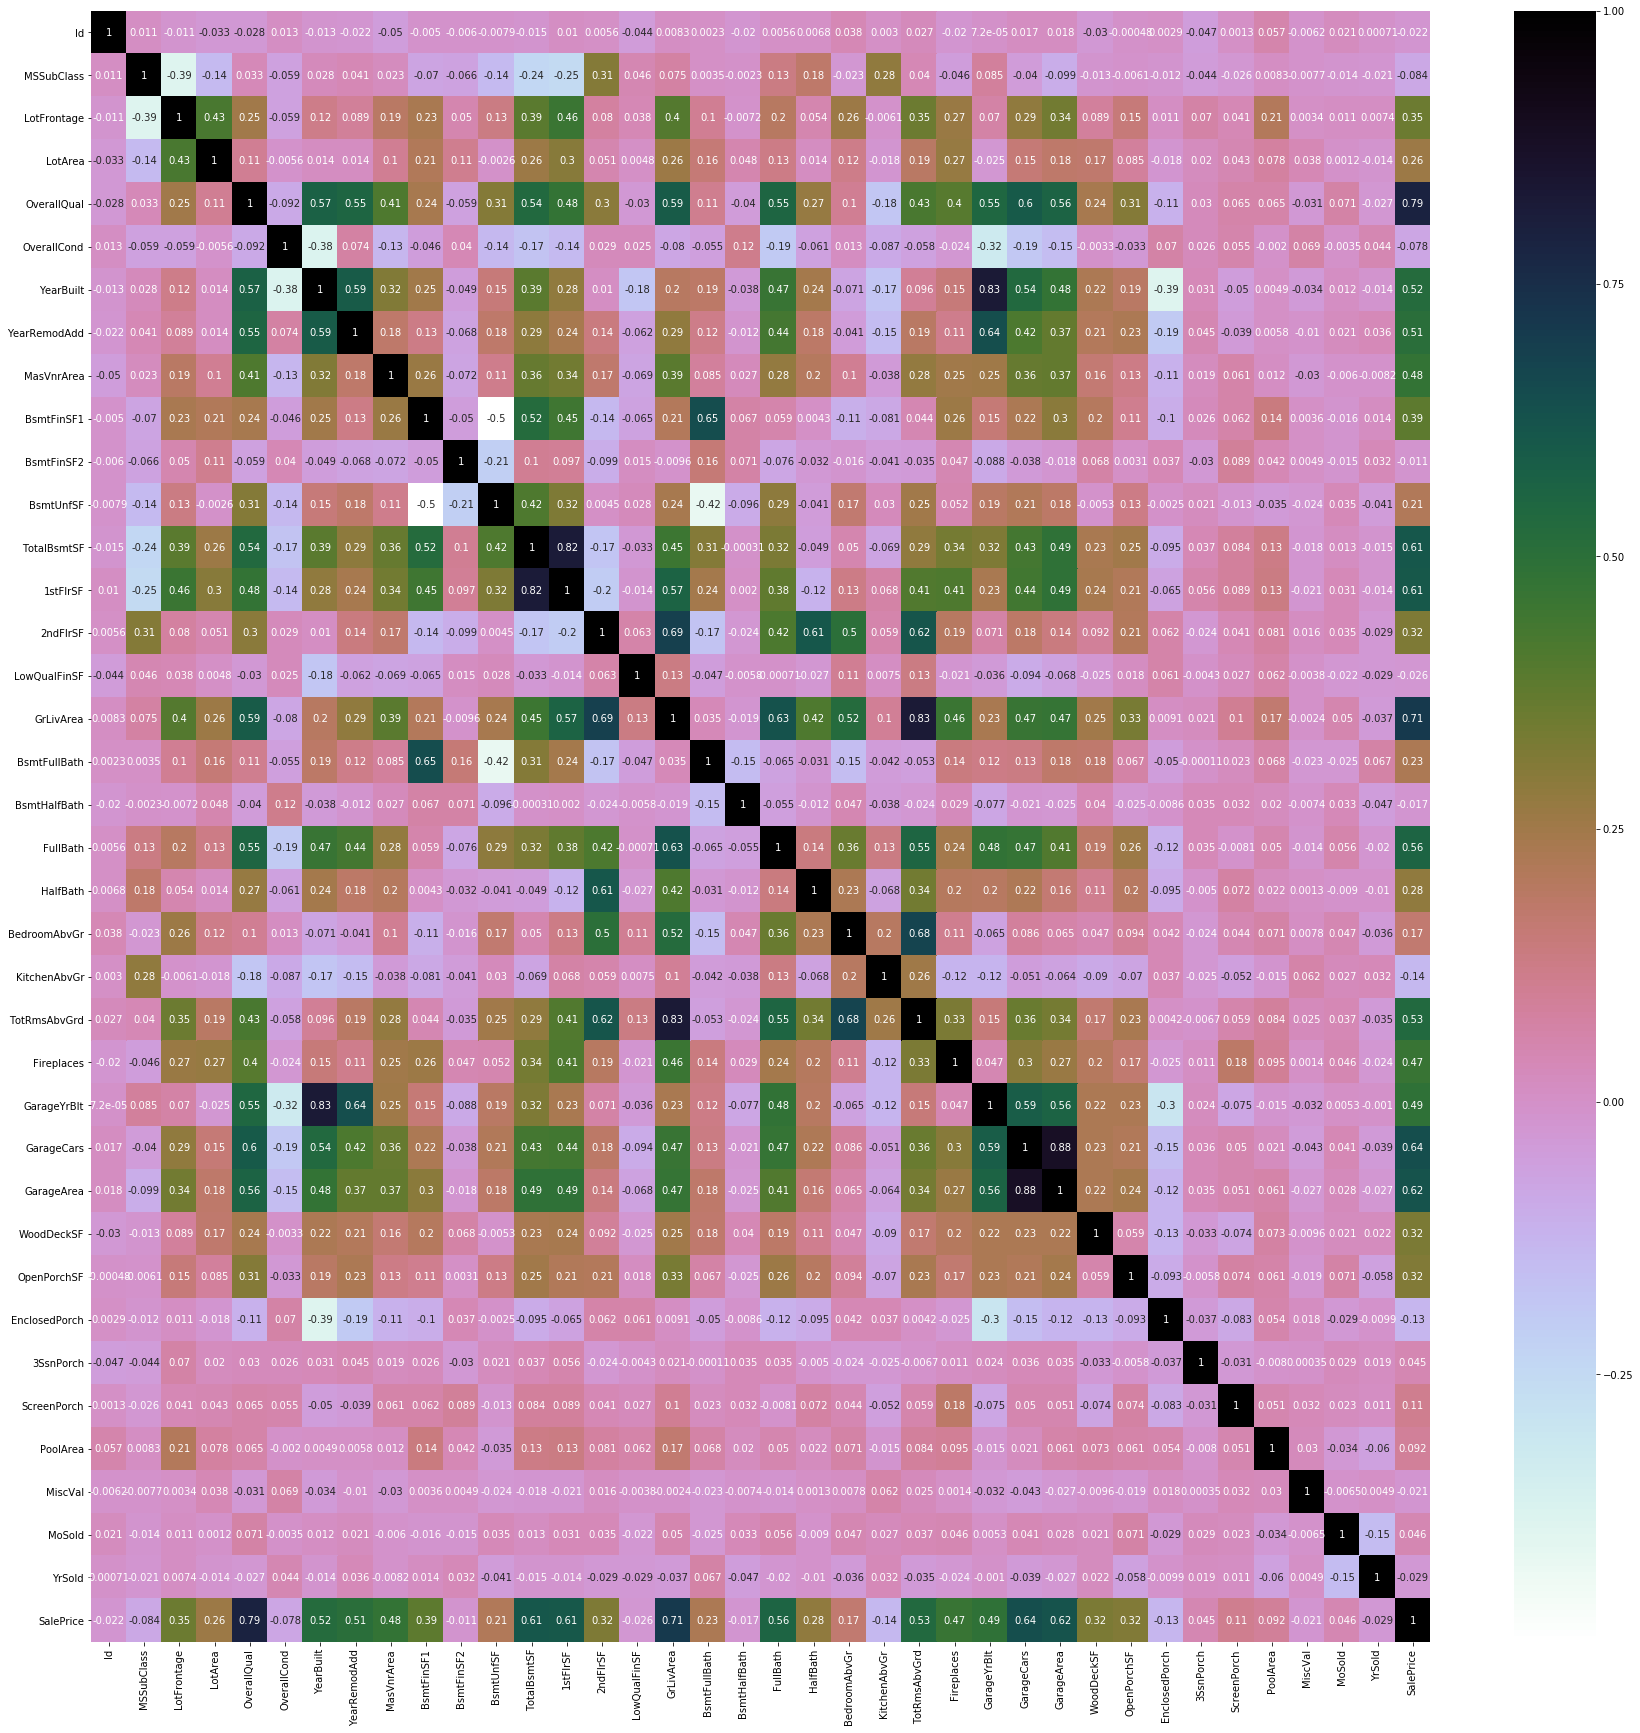

In [25]:
plt.figure(figsize=(30,30)) 
sns.heatmap(train_df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [26]:
(train_df.corr()["SalePrice"][(train_df.corr()["SalePrice"])>0.5]).sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

### 얘네들이 SalePrice와의 corr값이 0.5 이상인 애들.
SalePrice       1.000000 -> 결과값이니 제외
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101

### 어떤애들인지 설명데이터를 보면 아래와 같음.
1. OverallQual: Overall material and finish quality -> 전체재료 품질
2. GrLivArea: Above grade (ground) living area square feet -> 전체 넓이(모든층)
3. GarageCars: Size of garage in car capacity -> 주차가능 차대수
4. GarageArea: Size of garage in square feet -> 주차장넓이
5. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) -> 땅위 전체 방수
6. 1stFlrSF: First Floor square feet -> 1층의 넓이(대지와 맞닿아있는층)
7. FullBath: Full bathrooms above grade -> 화장실(Full) 갯수
8. YearBuilt: Original construction date -> 건축일
9. YearRemodAdd: Remodel date -> 리모델링 날짜.

# 5. Data Preprocessing
# 6. Data Cleaning
1. 10개 다쓰기로 했고, 얘네의 Nan길이 확인.
2. unique()보고
3. 값 replace 할거있으면 해주기.
4. Nan을 뭘로 채울지..는 좀있다. 3번까지 일단하자.

In [27]:
train_df.corr()["SalePrice"]["FullBath"]

0.5606637627484452

In [28]:
# feature로 사용할 column들만 일단 list로 할려고 했는데 category 데이터를 강제로 corr보려고 하면 에러뜸.
# 나중에 corr을 column으로 만들어서 [ㅇㄹㄴㅁㅇ>0.5]로 해서 하면 되는데위에 걸로 하려면 어떻게 하냐....
# 일단은 그냥 무식하게 10개를 list로 해서 그냥 df 수정함.

# main_columns = []
# for column in all_df.columns:
#     print(column)
#     if train_df.corr()["SalePrice"][column] > 0.5:
#         main_columns.append(column)
# main_columns

In [29]:
all_df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH', nan], dtype=object)

In [30]:
all_df.MSSubClass.unique()

array([60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80, 160, 75, 180, 40,
       150], dtype=object)

아래는 일단 corr이 0.5이상인 애들을 일일히 입력해서 df로 만들었음.  
나중에는 위의 for문이든 따로 column을 만들어서 하는걸 만들어봐야함. (숙제)  

In [31]:
main_columns = ["YearRemodAdd", "YearBuilt","TotRmsAbvGrd","FullBath","1stFlrSF","TotalBsmtSF","GarageArea","GarageCars","GrLivArea","OverallQual","SalePrice"]

In [32]:
all_filter_df = all_df[main_columns[:-1]]

In [33]:
train_filter_df = train_df[main_columns]

In [34]:
all_filter_df.head()

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual
0,2003,2003,8,2,856,856,548,2,1710,7
1,1976,1976,6,2,1262,1262,460,2,1262,6
2,2002,2001,6,2,920,920,608,2,1786,7
3,1970,1915,7,1,961,756,642,3,1717,7
4,2000,2000,9,2,1145,1145,836,3,2198,8


In [35]:
train_filter_df.head()

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
0,2003,2003,8,2,856,856,548,2,1710,7,208500
1,1976,1976,6,2,1262,1262,460,2,1262,6,181500
2,2002,2001,6,2,920,920,608,2,1786,7,223500
3,1970,1915,7,1,961,756,642,3,1717,7,140000
4,2000,2000,9,2,1145,1145,836,3,2198,8,250000


In [36]:
all_filter_df.isnull().sum()

YearRemodAdd    0
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
1stFlrSF        0
TotalBsmtSF     1
GarageArea      1
GarageCars      1
GrLivArea       0
OverallQual     0
dtype: int64

위의 head 데이터를 보면 다 연속데이터이다.  
Logistic으로 하면 좀 더 좋을거 같은데 그럴래면 각각의 연속데이터들을 cut이든 qcut이든 bins단위로 나눠주는과정 들어가야함.  
하지만 시간이 없는관계로 그냥 linear regression으로 해보고 나중에 위과정을 넣어서 logistic으로 값이 어떻게 바뀌는지 보자. 
dropna로 날린버전 안날린버전 두개다 해보자. 일단 날린버전을 따로 저장.

In [37]:
# all_without_na_filter_df = all_filter_df.dropna() -> 이거 하면 test_df쪽 row가 사라짐.
# 그래서 null 값들을 average값으로 변경할거다.

In [39]:
all_filter_df.TotalBsmtSF.mean()

1051.7775873886224

In [41]:
all_filter_df.TotalBsmtSF.fillna(all_filter_df.TotalBsmtSF.mean(), inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [42]:
all_filter_df.isnull().sum()

YearRemodAdd    0
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
1stFlrSF        0
TotalBsmtSF     0
GarageArea      1
GarageCars      1
GrLivArea       0
OverallQual     0
dtype: int64

In [43]:
all_filter_df.GarageArea.fillna(all_filter_df.GarageArea.mean(), inplace=True)
all_filter_df.GarageCars.fillna(all_filter_df.GarageCars.mean(), inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [44]:
all_filter_df.isnull().sum()

YearRemodAdd    0
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
1stFlrSF        0
TotalBsmtSF     0
GarageArea      0
GarageCars      0
GrLivArea       0
OverallQual     0
dtype: int64

In [140]:
train_filter_df.head()

,YearRemodAdd,YearBuilt,TotRmsAbvGrd,FullBath,1stFlrSF,TotalBsmtSF,GarageArea,GarageCars,GrLivArea,OverallQual,SalePrice
0,2003,2003,8,2,856,856,548,2,1710,7,208500
1,1976,1976,6,2,1262,1262,460,2,1262,6,181500
2,2002,2001,6,2,920,920,608,2,1786,7,223500
3,1970,1915,7,1,961,756,642,3,1717,7,140000
4,2000,2000,9,2,1145,1145,836,3,2198,8,250000


In [141]:
train_filter_df.isnull().sum()

YearRemodAdd    0
YearBuilt       0
TotRmsAbvGrd    0
FullBath        0
1stFlrSF        0
TotalBsmtSF     0
GarageArea      0
GarageCars      0
GrLivArea       0
OverallQual     0
SalePrice       0
dtype: int64

이제 fitting하고 predict하자.  
fit은 train_filter_df랑 y_train_df로 하면되는데 나의 경우 y_train_df에는 Id값이 있고 저기엔 id가 없다.  
어짜피 fitting에 id는 중요치 않으므로 y_train_df의 id를 지운걸 따로 저장하고.
그담에 fitting.

그리고 test는 all_without_na_filter_df로 predict하고 그 값을 train과 test로 나눠서 그 값들을 보자. 
어라 그럴래면 위의 data들을 다 id로 index했어야하네.. 일단 ㄱㄱ



dropna로 하면 id가 중간중간 좀 없어짐.  
그래서 fillna로 해서 각 column 별 average값으로 채우고 그 걸로 fitting해서 결과보자.  
feature scaling안한버전으로 결과보고. 한버전은 나중에 보자.  
지금은 제일 뭐 안넣은 버전으로 4시까지 결과보고. 나머지 여러가지 해볼 버전들은 이번주에한다. 

# 7. Visualization
# 8. Model Design, Training, and Offline Evaluation
# 9. Model Deployment, Online Evaluation, and Monitoring
# 10. Model Maintenance, Diagnosis, and Retraining

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()

In [53]:
y_train_df.head()

,Id,SalePrice
0,1,208500
1,2,181500
2,3,223500
3,4,140000
4,5,250000


In [61]:
y_train_df.drop(columns=["Id"], inplace=True)

In [71]:
lr.fit(train_filter_df.drop(columns=["SalePrice"]), y_train_df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
lr.coef_, lr.intercept_

(array([[ 2.96481161e+02,  2.68240707e+02,  3.31050771e+01,
         -6.79087146e+03,  1.41737355e+01,  1.98650991e+01,
          1.49475334e+01,  1.04179010e+04,  5.12971178e+01,
          1.96045898e+04]]), array([-1186193.76666629]))

In [76]:
y_predict_df = lr.predict(all_filter_df)

In [108]:
all_index = np.concatenate((train_index, test_index), axis=0)

In [113]:
result = np.concatenate((all_index.reshape(-1,1), y_predict_df), axis=1)

In [126]:
result_df = pd.DataFrame(result, columns=["Id", "SalePrice"])

In [128]:
result_df.set_index("Id", inplace=True)

In [130]:
result_df = result_df[result_df.index>=1461]

In [134]:
result_df.to_csv("submission_result.csv", index=True)